**Ονοματεπώνυμο: Ελευθερία Αρκαδοπούλου**

**ΑΜ: el19442**

<h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις μετρικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες τεχνικές που έχουν ως στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [ ]:
%matplotlib inline

import matplotlib
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Η κατανομή της κεντρικότητας εγγύτητας και η μέση κεντρικότητα εγγύτητας κάθε τοπολογίας.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες</a></caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Game of Thrones - season 5</td>
    <td style=text-align:left><a style=text-decoration:none href='https://networkofthrones.wordpress.com/the-series/season-5/'>GoT</a></td>
    <td style=text-align:left><p style=text-align:justify> The season 5 <b>GoT</b> network represents the interactions between the characters of Game of Thrones in season 5. The season 5 network has 118 nodes (characters) and 394 weighted edges, corresponding to 5,139 interactions. Data can be found here: <a style=text-decoration:none href='https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-edges.csv'>GoT_data</a></p>
</tr>
<tr>
    <td style=text-align:left>email-Eu-core</td>
    <td style=text-align:left><a style=text-decoration:none href='https://snap.stanford.edu/data/email-Eu-core.html'>email-eu-core</a></td>
    <td style=text-align:left><p style=text-align:justify> The network <b>email-Eu-core</b> was generated using email data from a large European research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core) and the dataset does not contain incoming messages from or outgoing messages to the rest of the world. The dataset also contains "ground-truth" community memberships of the nodes. Each individual belongs to exactly one of 42 departments at the research institute. </p>
</tr>
    
</table>

<h4>Παραγωγή συνθετικών τοπολογιών</h4>
<p>Προσοχή! Τα δίκτυα που θα παράξετε θα πρέπει να είναι συνδεδεμένα.</p>

In [ ]:
graphs=[]

In [ ]:
n=80
d=4
M=300
R=0.25
p=0.3
k=4
seedno=5
random.seed(seedno)

REG = nx.watts_strogatz_graph(n,d,0,seedno)
REG.graph['title'] = "REG"
graphs.append(REG)
RGER=nx.gnm_random_graph(n,M,seedno)
RGER.graph['title'] = "RGER"
graphs.append(RGER)
RGG=nx.random_geometric_graph(n,R,seed=seedno)
RGG.graph['title'] = "RGG"
graphs.append(RGG)
SF=nx.barabasi_albert_graph(n,d,seed=seedno)
SF.graph['title'] = "SF"
graphs.append(SF)
SW=nx.watts_strogatz_graph(n,d,p=p,seed=seedno)
SW.graph['title'] = "SW"
graphs.append(SW)

Οπτικοποίηση των γράφων:

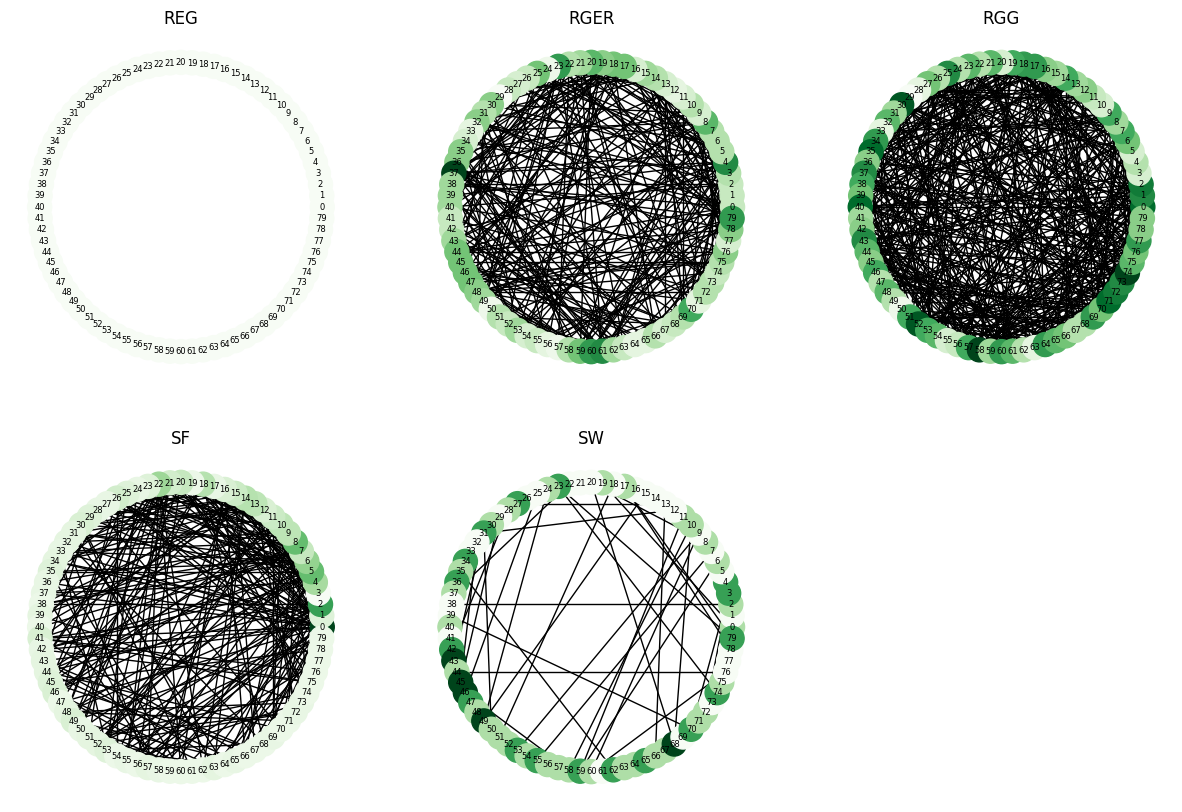

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, g in enumerate(graphs):
    degree = dict(nx.degree(g))
    node_color = list(degree.values())
    row, col = divmod(i, 3) #indexes
    nx.draw_circular(g, with_labels=True, node_color=node_color, font_size=6, cmap=plt.cm.Greens, edge_color='black', ax=axes[row, col])
    axes[row, col].set_title(g.graph.get('title'))

axes[-1, -1].axis('off')
#plt.tight_layout()
plt.show()

<h4>Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

In [ ]:
real_graphs=[]

In [ ]:
#football network
football=nx.read_gml(r"football.gml")
football.graph['title'] = "football"
real_graphs.append(football)

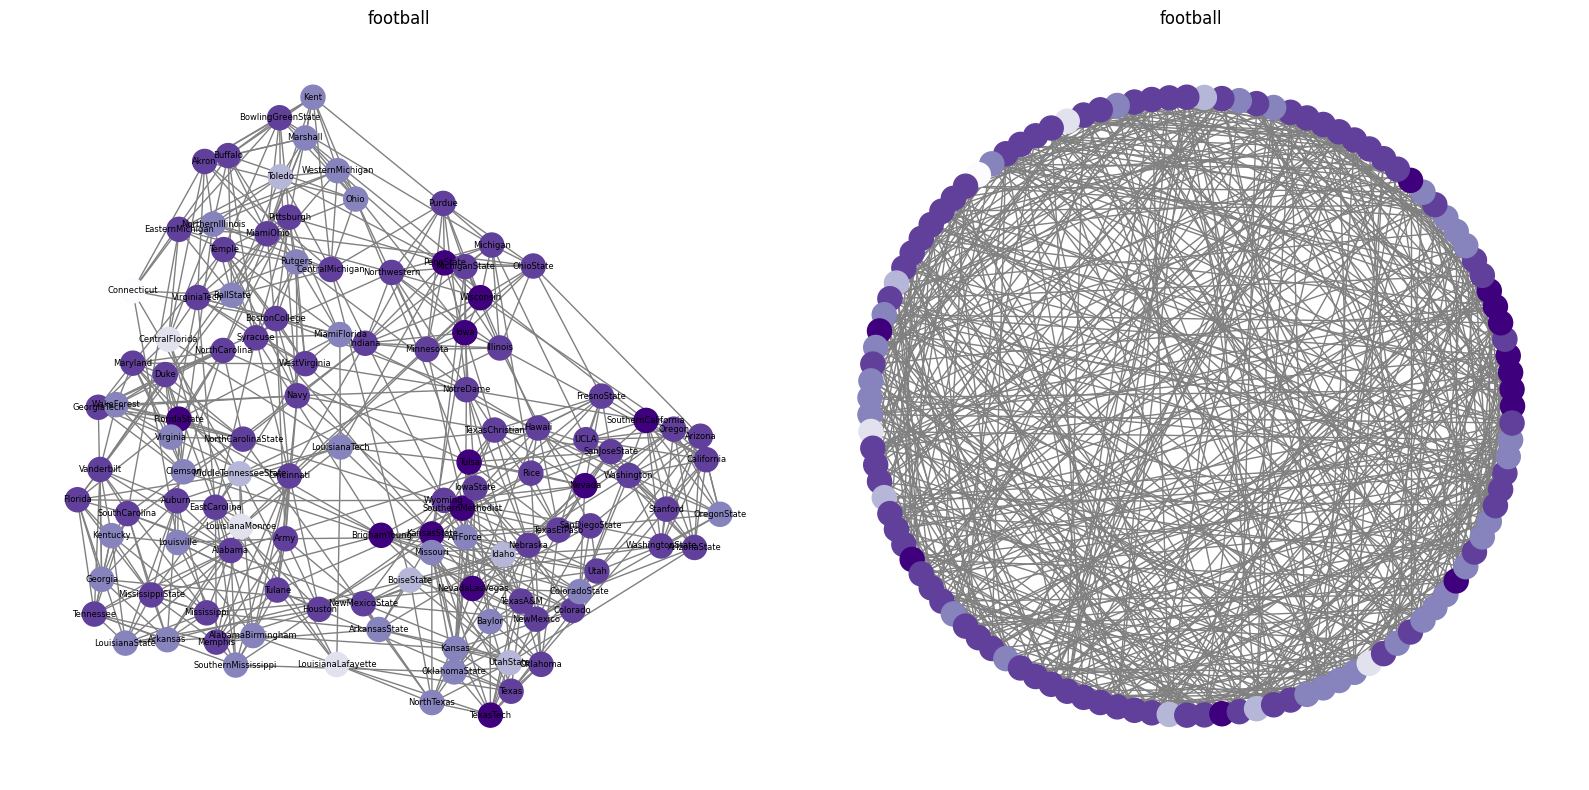

In [ ]:
degree = dict(nx.degree(football))
node_color=list(degree.values())
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title(football.graph.get('title'))
nx.draw_spring(football, with_labels=True, font_size=6, node_color=node_color, cmap=plt.cm.Purples, edge_color='gray')
plt.subplot(1, 2, 2)
plt.title(football.graph.get('title'))
nx.draw_circular(football, with_labels=False, node_color=node_color, cmap=plt.cm.Purples, edge_color='gray')
plt.tight_layout()
plt.show()

In [ ]:
#Game of thrones network
import csv
got=nx.Graph()
with open('got_s5.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_reader)
    for row in csv_reader:
        got.add_edge(row[0],row[1])
        line_count += 1
real_graphs.append(got)
got.graph['title'] = "GOT"

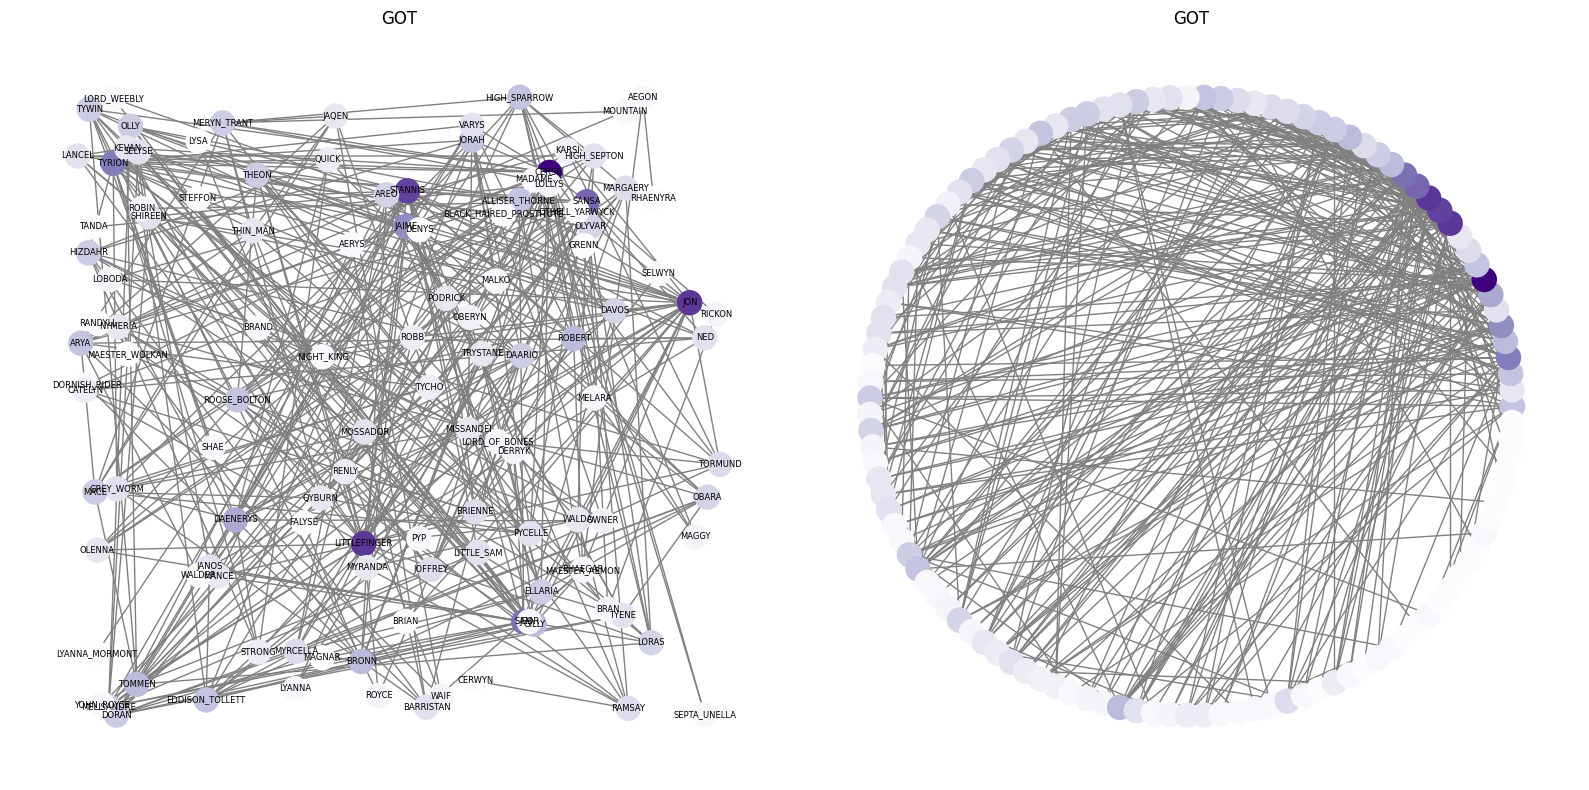

In [ ]:
plt.figure(figsize=(16, 8))
degree = dict(nx.degree(got))
node_color=list(degree.values())
plt.subplot(1, 2, 1)
plt.title(got.graph.get('title'))
nx.draw_random(got, with_labels=True, font_size=6, node_color=node_color, cmap=plt.cm.Purples, edge_color='gray')
plt.subplot(1, 2, 2)
plt.title(got.graph.get('title'))
nx.draw_circular(got, with_labels=False, node_color=node_color, cmap=plt.cm.Purples, edge_color='gray')
plt.tight_layout()
plt.show()

#### Προσοχή! Θα μελετήσετε τη μεγαλύτερη συνδεδεμένη συνιστώσα του δικτύου email-Eu-core, αφού πρώτα αφαιρέσετε τα self-loops. Μπορείτε να κάνετε χρήση των συναρτήσεων connected_components, subgraph, remove_edges_from του networkx.

In [ ]:
#email-Eu-core network
eu=nx.read_edgelist("email-Eu-core.txt",create_using=nx.Graph())
eu.remove_edges_from(nx.selfloop_edges(eu))

In [ ]:
#find the largest weakly connected component of the graph
largest_cc = max(nx.connected_components(eu), key=len)
eu_largest_component = eu.subgraph(largest_cc)
eu_graph = eu.subgraph(eu_largest_component)
real_graphs.append(eu_graph)
eu_graph.graph['title'] = "EU"

Στην οπτικοποίηση αυτού του γράφου δεν φαίνονται τα labels των κόμβων, προκειμένου να μην είναι δυσανάγνωστη η εικόνα.

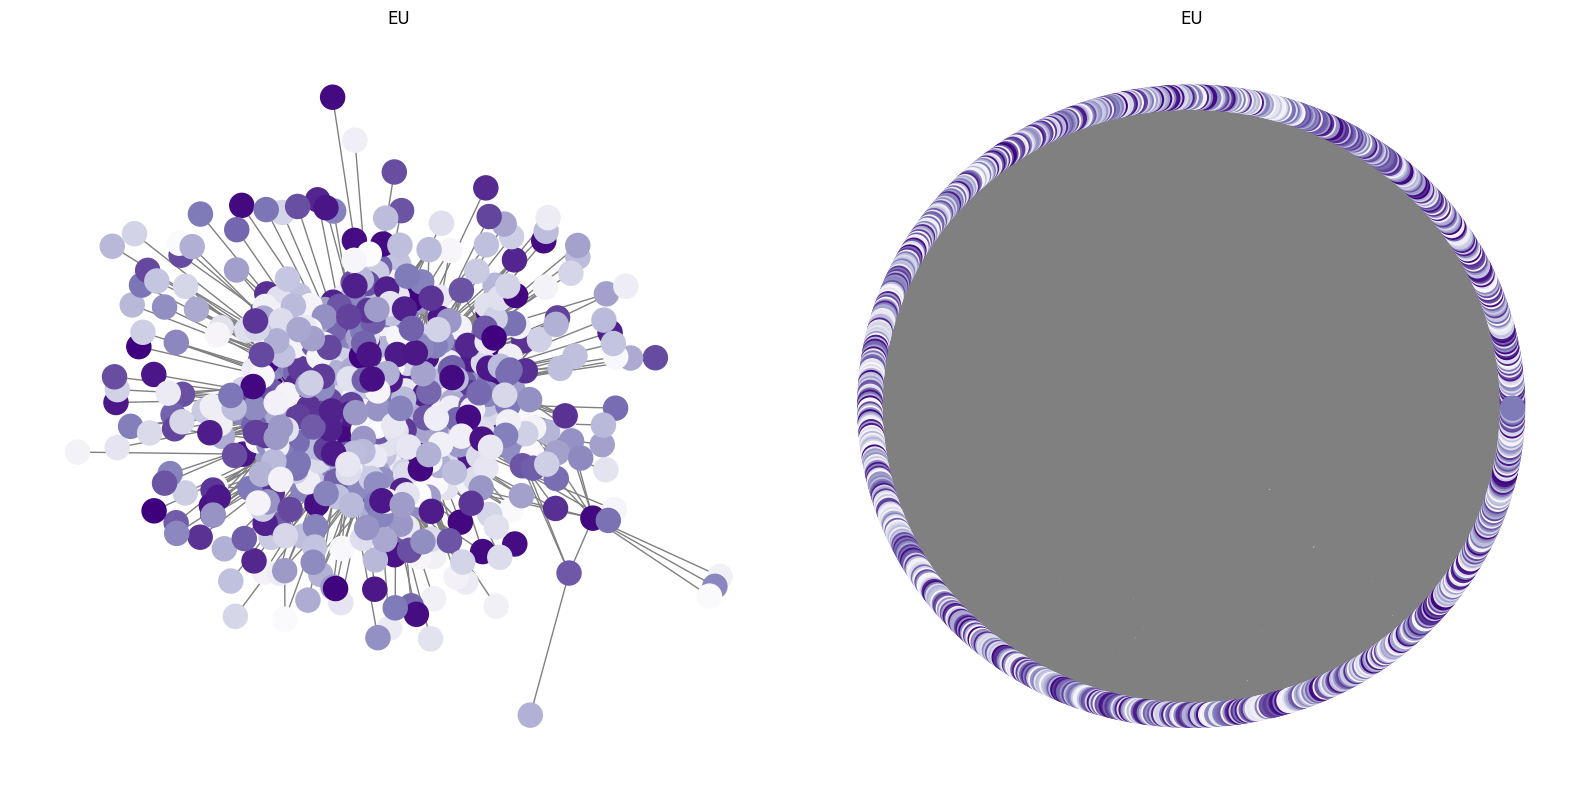

In [ ]:
plt.figure(figsize=(16, 8))
nodes = list(eu_graph.nodes())
random_colors = [random.random() for _ in range(len(nodes))]
plt.subplot(1, 2, 1)
plt.title(eu_graph.graph.get('title'))
nx.draw_spring(eu_graph,
               node_color=random_colors,
               cmap=plt.cm.Purples,
               edge_color='gray')
plt.subplot(1, 2, 2)
plt.title(eu_graph.graph.get('title'))
nx.draw_circular(eu_graph, with_labels=False, node_color=random_colors, cmap=plt.cm.Purples, edge_color='gray')
plt.tight_layout()
plt.show()

<h4>Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

Συνθετικές τοπολογίες

Average degree for REG is: 4.0
Average degree for RGER is: 7.5
Average degree for RGG is: 11.25
Average degree for SF is: 7.6
Average degree for SW is: 4.0


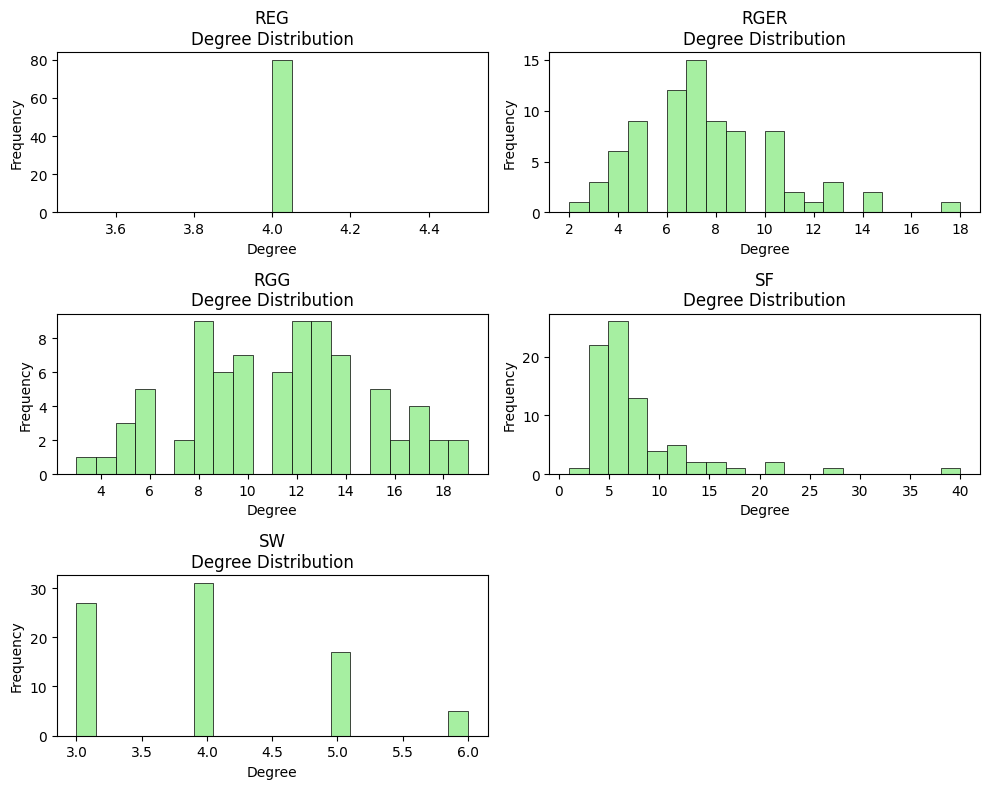

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
for i, G in enumerate(graphs):
    degree = [x[1] for x in G.degree()]
    average_degree = (np.mean(degree))
    title = G.graph.get('title', f'Graph {i + 1}')
    ax = axes[i // 2, i % 2]
    ax.hist(degree, bins=20, color='#A6EFA1', edgecolor='black', linewidth=0.5)
    ax.set_title(f"{title}\nDegree Distribution")
    ax.set_xlabel("Degree")
    ax.set_ylabel("Frequency")
    avg_clustering = nx.average_clustering(G)
    print(f"Average degree for {title} is: {average_degree}")

axes[-1, -1].axis('off')
plt.tight_layout()
plt.show()

Πραγματικές τοπολογίες

Average degree for football is: 11
Average degree for GOT is: 7
Average degree for EU is: 33


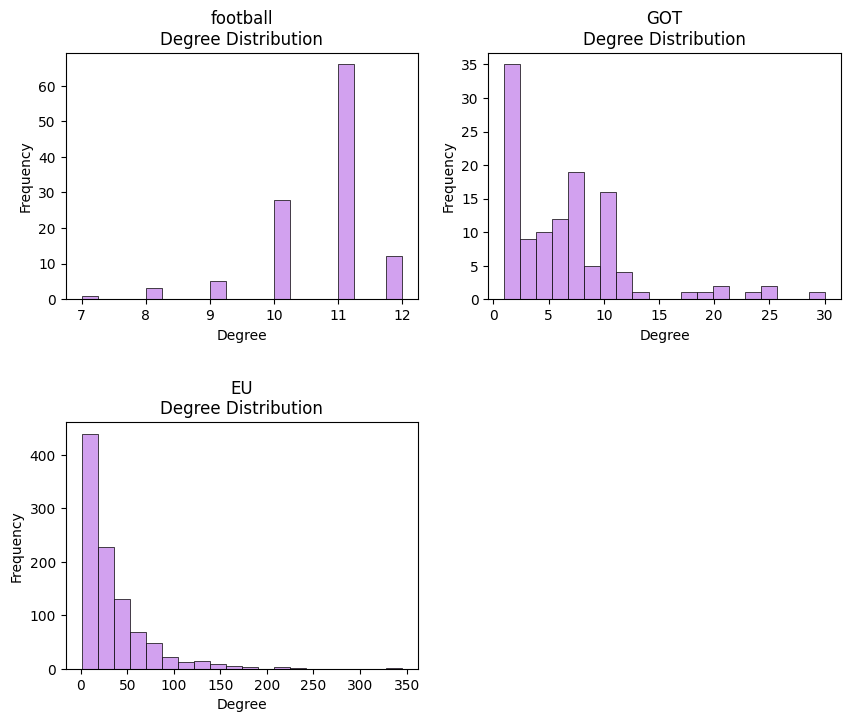

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for i, G in enumerate(real_graphs):
    degree = [x[1] for x in G.degree()]
    average_degree = round(np.mean(degree))
    title = G.graph.get('title', f'Graph {i + 1}')
    ax = axes[i // 2, i % 2]
    ax.hist(degree, bins=20, color='#D2A1EF', edgecolor='black', linewidth=0.5)
    ax.set_title(f"{title}\nDegree Distribution")
    ax.set_xlabel("Degree")
    ax.set_ylabel("Frequency")
    avg_clustering = nx.average_clustering(G)
    print(f"Average degree for {title} is: {average_degree}")

axes[-1, -1].axis('off')
plt.subplots_adjust(hspace=0.5)
plt.show()

<h4>Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

Συνθετικές τοπολογίες

Average clustering coefficient for REG is: 0.5
Average clustering coefficient for RGER is: 0.08497775916893564
Average clustering coefficient for RGG is: 0.6825788363897884
Average clustering coefficient for SF is: 0.22922761606585143
Average clustering coefficient for SW is: 0.16708333333333333


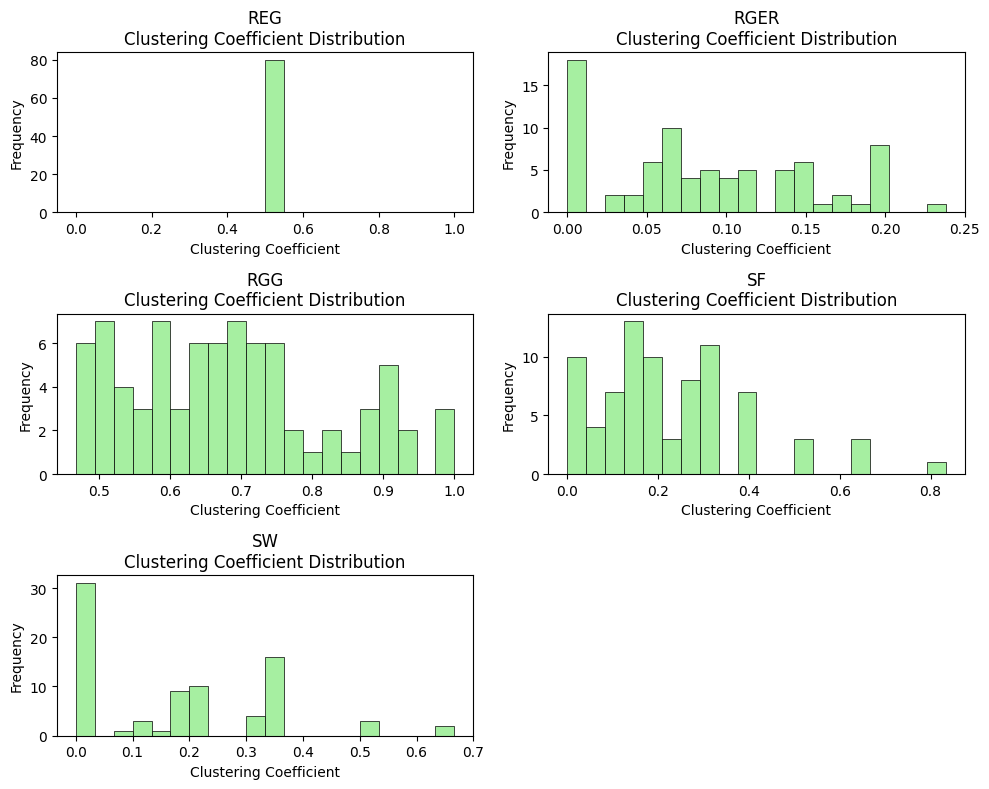

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
for i, G in enumerate(graphs):
    coeff = list(nx.clustering(G).values())
    title = G.graph.get('title', f'Graph {i + 1}')
    ax = axes[i // 2, i % 2]
    ax.hist(coeff, bins=20, color='#A6EFA1', edgecolor='black', linewidth=0.5)
    ax.set_title(f"{title}\nClustering Coefficient Distribution")
    ax.set_xlabel("Clustering Coefficient")
    ax.set_ylabel("Frequency")
    avg_clustering = nx.average_clustering(G)
    print(f"Average clustering coefficient for {title} is: {avg_clustering}")

axes[-1, -1].axis('off')
plt.tight_layout()
plt.show()

Πραγματικές τοπολογίες

Average clustering coefficient for football is: 0.40321601104209814
Average clustering coefficient for GOT is: 0.5744036387164706
Average clustering coefficient for EU is: 0.40705044751953817


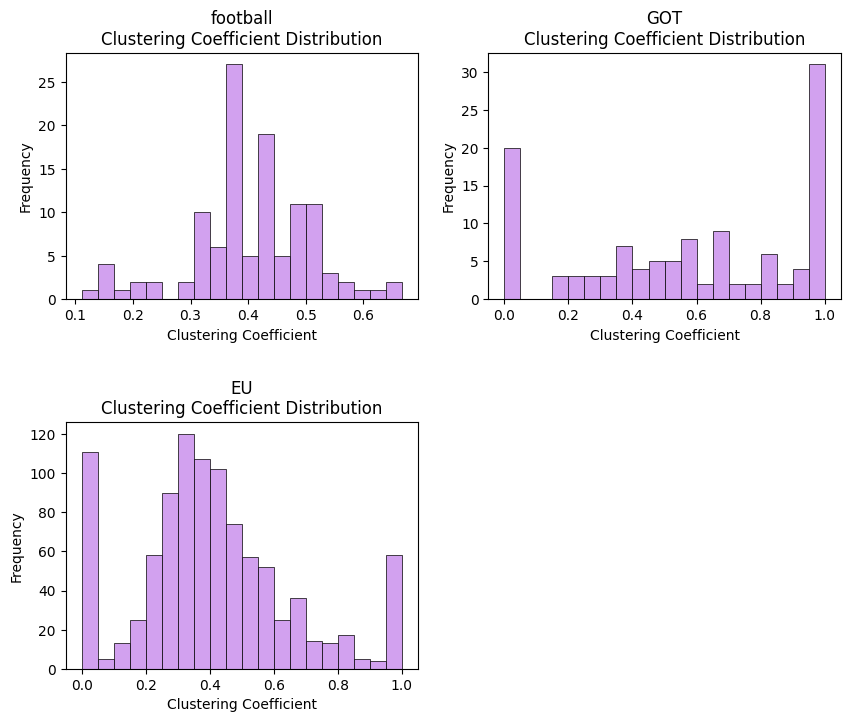

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for i, G in enumerate(real_graphs):
    coeff = list(nx.clustering(G).values())
    title = G.graph.get('title', f'Graph {i + 1}')
    ax = axes[i // 2, i % 2]
    ax.hist(coeff, bins=20, color='#D2A1EF', edgecolor='black', linewidth=0.5)
    ax.set_title(f"{title}\nClustering Coefficient Distribution")
    ax.set_xlabel("Clustering Coefficient")
    ax.set_ylabel("Frequency")
    avg_clustering = nx.average_clustering(G)
    print(f"Average clustering coefficient for {title} is: {avg_clustering}")

axes[-1, -1].axis('off')
plt.subplots_adjust(hspace=0.5)
plt.show()

<h4>Μελέτη κεντρικότητας εγγύτητας για πραγματικές και συνθετικές τοπολογίες </h4>

Συνθετικές τοπολογίες

Average closeness centrality for REG is: 0.09634146341463413
Average closeness centrality for RGER is: 0.4242297800918761
Average closeness centrality for RGG is: 0.320088016052558
Average closeness centrality for SF is: 0.4464453837879834
Average closeness centrality for SW is: 0.26914269896354603


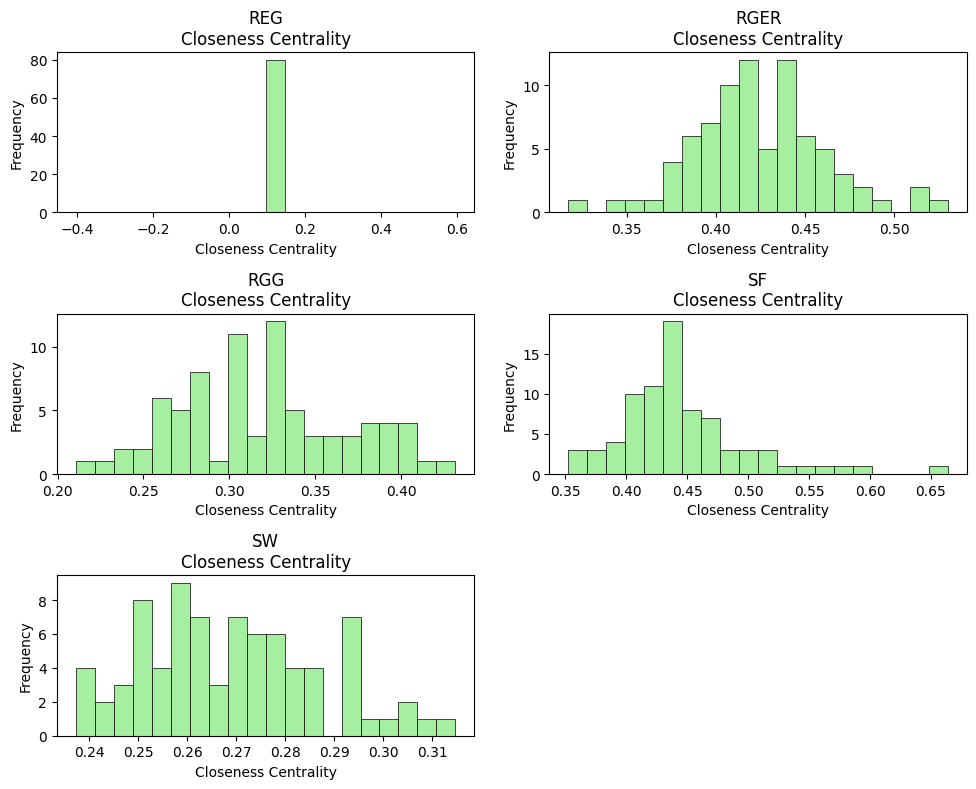

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
for i, G in enumerate(graphs):
    close_dict = nx.closeness_centrality(G)
    close_values = list(close_dict.values())
    title = G.graph.get('title', f'Graph {i + 1}')
    ax = axes[i // 2, i % 2]
    ax.hist(close_values, bins=20, color='#A6EFA1', edgecolor='black', linewidth=0.5)
    ax.set_title(f"{title}\nCloseness Centrality")
    ax.set_xlabel("Closeness Centrality")
    ax.set_ylabel("Frequency")
    avg_centrality = np.mean(list(close_values))
    print(f"Average closeness centrality for {title} is: {avg_centrality}")

axes[-1, -1].axis('off')
plt.tight_layout()
plt.show()

Πραγματικές τοπολογίες

Average closeness centrality for football is: 0.39931907825186225
Average closeness centrality for GOT is: 0.31905170483140755
Average closeness centrality for EU is: 0.39446404120869627


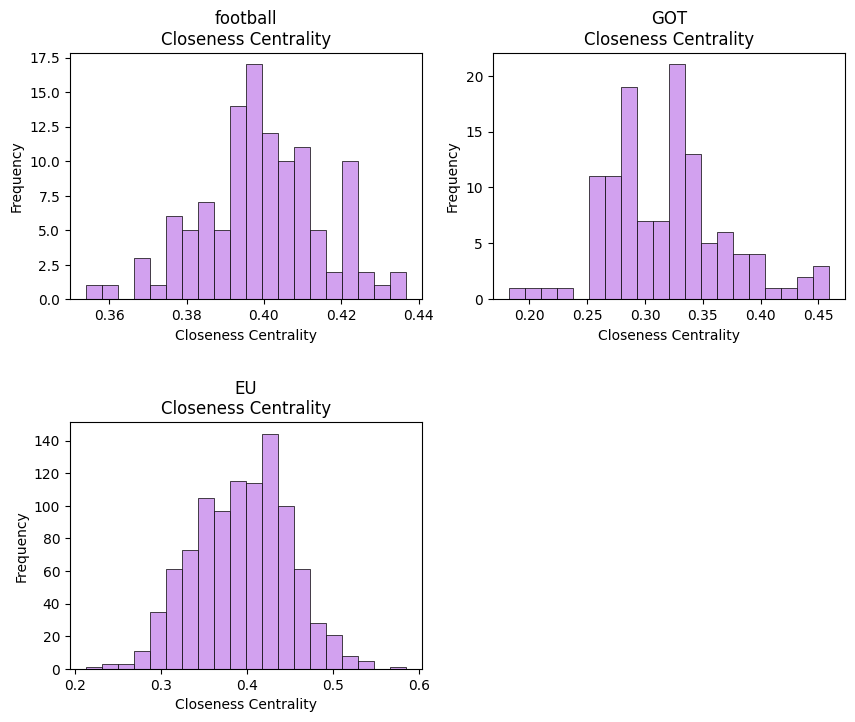

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for i, G in enumerate(real_graphs):
    close_dict = nx.closeness_centrality(G)
    close_values = list(close_dict.values())
    title = G.graph.get('title', f'Graph {i + 1}')
    ax = axes[i // 2, i % 2]
    ax.hist(close_values, bins=20, color='#D2A1EF', edgecolor='black', linewidth=0.5)
    ax.set_title(f"{title}\nCloseness Centrality")
    ax.set_xlabel("Closeness Centrality")
    ax.set_ylabel("Frequency")
    avg_centrality = np.mean(list(close_values))
    print(f"Average closeness centrality for {title} is: {avg_centrality}")

axes[-1, -1].axis('off')
plt.subplots_adjust(hspace=0.5)
plt.show()

<font size="3">**Σχολιασμός αποτελεσμάτων:**

---




*   **Football**: σε ό,τι έχει να κάνει με την κατανομή βαθμού κόμβων, στο συγκεκριμένο γράφο παρατηρούμε ότι οι περισσότεροι κόμβοι έχουν υψηλό βαθμό,
κάτι που παραπέμπει στις τοπολογίες RGER, RGG. Η κατανομή των συντελεστών ομαδοποίησης φαίνεται να είναι κανονική,
με τη μέση τιμή τους να είναι 0.4, που παραπέμπει περισσότερο στην τοπολογία RGG. Η κεντρικότητα εγγύτητας παραπέμπει
και πάλι σε RGER τοπολογία, λόγω της μέσης τιμής 0.4 αλλά και της κατανομής. Τέλος, η οπτικοποίηση του γράφου
παραπέμπει σε RGER τοπολογία, αφού οι περισσότεροι κόμβοι έχουν κοντινούς βαθμούς.
Συμπερασματικά, ο γράφος football είναι πιο κόντα σε RGER γράφο, αλλά κάποια χαρακτηριστικά του μοιάζουν με χαρακτηριστικά
RGG γράφου.


*   **GOT**: από την οπτικοποίησή του, ο γράφος είναι πολυ κοντά στην τοπολογία SF. Αυτό είναι ορατό και από το διάγραμμα κατανομής
βαθμών κόμβων, όπου φαίνεται ότι οι περισσότεροι κόμβοι έχουν πολύ μικρό βαθμό, ενώ πολύ λίγοι έχουν υψηλότερο.
Η κατανομή των συντελεστών ομαδοποίησης του γράφου δεν είναι κοντά σε κάποια από τις κατανομές των γνωστών
τοπολογιών, με κάποια από τα χαρακτηριστικά της να παραπέμπουν στην RGG κατανομή. Τέλος, η κατανομή του
closeness centrality παραπέμπει και πάλι σε SF τοπολογία, με τις τιμές της να είναι επίσης πολύ κοντινές.
Συμπερασματικά, μπορούμε να χαρακτηρίσουμε τον γράφο GOT ως SF γράφο, παρατηρώντας ότι η κατανομή των συντελεστών
ομαδοποίσης παρεκλίνει από τη γνωστή του SF.


*   **EU**: Από την οπτικοποίηση του γράφου, δεν φαίνεται ξεκάθαρα να παραπέμπει σε κάποια από τις γνωστές τοπολογίες,
καθώς ο μεγάλος αριθμός κόμβων και ακμών καθιστά τα χαρακτηριστικά του γράφου δυσδιάκριτα. Η κατανομή
των βαθμών κόμβων, όπου φαίνεται οτι σχεδόν όλοι οι κόμβοι έχουν πολύ μικρό βαθμό, με πολύ λίγους να έχουν
μεγαλύτερο, παραπέμπει στην γνωστή κατανομή βαθμών κόμβων της τοπολογίας SF, που πρόκειται για power-law
τοπολογία. Η κατανομή συντελεστών ομαδοποίησης δε φαίνεται να προσιδεάζει σε μεγάλο βαθμό καμία από τις γνωστές τοπολογίες,
με κάποια από τα χαρακτηριστικά της να παραπέμπουν στην RGG κατανομή. Η κατανομή closeness centrality αλλά και οι τιμές
closeness centrality παραπέμπουν στην τοπολογία SF.
Συμπερασματικά, ομοίως με τον GOT, μπορούμε να χαρακτηρίσουμε τον γράφο EU ως SF γράφο, παρατηρώντας ότι η κατανομή των συντελεστών
ομαδοποίσης παρεκλίνει από τη γνωστή του SF.





<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<ol>
<li>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο,</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<li>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία αξιολογήστε την ποιότητα της διαμέρισης με τις μετρικές performance και modularity (<a style=text-decoration:none href='https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.quality'>measuring_partitions</a>). Για την μετρική performance, θα χρησιμοποιήσετε την συνάρτηση partition_quality του networkx.</li>
<li>Για την μεγαλύτερη συνδεδεμένη συνιστώσα του email-Eu-core, να συγκρίνετε την ground-truth διαμέριση που δίνεται στο αρχείο Email-Eu-core-department-labels.txt με τις διαμερίσεις που προκύπτουν από τις εξεταζόμενες μεθόδους ως προς το πλήθος των παραγόμενων κοινοτήτων και ως προς τις μετρικές performance και modularity. </li>
<li>Για την παρακολούθηση του χρόνου εκτέλεσης της υλοποίησής σας, μπορείτε να χρησιμοποιήσετε την βιβλιοθήκη <a style=text-decoration:none href='https://tqdm.github.io/'>tqdm</a>. Στο σχολιασμό σας να λάβετε υπόψη το trade-off της ποιότητας της διαμέρισης και του χρόνου εκτέλεσης των εξεταζόμενων αλγορίθμων. </li>
</ol>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

In [ ]:
#Χρησιμοποιήστε την συνάρτηση conv2int για να μετατρέψετε τα labels των κόμβων στις πραγματικ΄ές τοπολογίες σε integers
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

<h4> Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [ ]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

<h4> Άλλες βιβλιοθήκες </h4>

In [ ]:
import itertools as itools
from networkx.algorithms.community import quality
from tqdm import tqdm

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>
<p>Παράξτε τις διαμερίσεις που προκύπτουν από την μέθοδο Newman-Girvan. Ελέγξτε τις διαμερίσεις που έχουν μέχρι και 50 κοινότητες.</p>
<p> Επιλέξτε τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

In [ ]:
total_graphs = graphs+real_graphs

In [ ]:
for g in total_graphs:
  print(g.graph['title'])

REG
RGER
RGG
SF
SW
football
GOT
EU


In [ ]:
results_ng=[]

In [ ]:
def newman_girvan_communities(g): #function for newman-girvan method for partitions with up to 50 communities
  bestModularity = (-1, None) #lowest possible modularity, community
  bestCommunityM = {}
  bestPerformance = (0, None) #lowest possible performance, community
  bestCommunityP = {}
  clustering = nx.community.girvan_newman(g)
  partitions = itools.takewhile(lambda i: len(i) <= 50, clustering) #up to 50 communities
  results = []

  for communities in tqdm(partitions):
    modularity = quality.modularity(g, communities)
    if modularity > bestModularity[0]:
      bestModularity = (modularity, communities)
    performance = nx.algorithms.community.quality.partition_quality(g, communities)[1]
    if performance > bestPerformance[0]:
      bestPerformance = (performance, communities)

  results.append(bestModularity)
  results.append(bestPerformance)

  return results #a list of tuples

In [ ]:
for g in total_graphs:
  results_ng.append(newman_girvan_communities(g))

49it [00:00, 97.46it/s] 
49it [00:03, 15.53it/s]
49it [00:02, 20.23it/s]
49it [00:05,  9.17it/s]
49it [00:00, 65.05it/s]
49it [00:07,  6.41it/s]
49it [00:04, 11.41it/s]
49it [17:55, 21.95s/it]


<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering. </h4>
Προσοχή! Για την επιλογή της τιμής της παραμέτρου που αφορά στην διάσταση του projection subspace (n_clusters) της συνάρτησης SpectralClustering, θα πρέπει να λάβετε υπόψη το μέγεθος |V| του εκάστοτε δικτύου.
<p>Να εξετάσετε τις διαμερίσεις που προκύπτουν για n_clusters$=2,...,50 Να επιλέξετε για οπτικοποίηση τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

In [ ]:
results_sc=[]

In [ ]:
def spectral_clustering_clusters(g):
    bestModularity = (-1, None)  # lowest possible modularity, community
    bestPerformance = (0, None)  # lowest possible performance, community
    adj_matrix = nx.to_numpy_array(g)
    nodes = list(g.nodes())
    V = g.number_of_nodes()
    results = []

    for n in tqdm(range(2, 51)):
        clusters = SpectralClustering(n_clusters=n, affinity='precomputed').fit(adj_matrix)
        communities = ()
        for x in range(n):
            communities += (set(),) #create sets
        for x in range(V):
            communities[clusters.labels_[x]].add(nodes[x]) #add the nodes

        modularity = quality.modularity(g, communities)
        performance = nx.algorithms.community.quality.partition_quality(g, communities)[1]

        if modularity > bestModularity[0]:
            bestModularity = (modularity, communities)
        if performance > bestPerformance[0]:
            bestPerformance = (performance, communities)

    results.append(bestModularity)
    results.append(bestPerformance)

    return results

In [ ]:
for g in total_graphs:
  results_sc.append(spectral_clustering_clusters(g))

100%|██████████| 49/49 [00:57<00:00,  1.18s/it]


<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>
Για την διαμέριση που θα προκύψει σε κάθε συνθετικό και πραγματικό δίκτυο, να υπολογίσετε το modularity score και το performance score.

In [ ]:
import time

def modularity_maximization(g):
    bestModularity = (-1, None)  # lowest possible modularity, community
    bestPerformance = (0, None)  # lowest possible performance, community
    results = []

    start_time = time.time()
    communities = nx.algorithms.community.greedy_modularity_communities(g)

    bestModularity = (quality.modularity(g, communities), communities)
    bestPerformance = (quality.partition_quality(g, communities)[1], communities)

    end_time = time.time()

    results.append(bestModularity)
    results.append(bestPerformance)

    print(f"Time elapsed: {np.format_float_positional(end_time-start_time, 3)} sec.")

    return results

In [ ]:
results_mm=[]

In [ ]:
for g in tqdm(total_graphs):
  results_mm.append(modularity_maximization(g))

 50%|█████     | 4/8 [00:00<00:00, 37.33it/s]

Time elapsed: 0.016 sec.
Time elapsed: 0.026 sec.
Time elapsed: 0.035 sec.
Time elapsed: 0.028 sec.
Time elapsed: 0.016 sec.
Time elapsed: 0.052 sec.
Time elapsed: 0.037 sec.


100%|██████████| 8/8 [00:06<00:00,  1.29it/s]

Time elapsed: 5.979 sec.


**Οπτικοποίηση**

In [ ]:
list_of_methods = ['Newman-Girvan - Best Modularity', 'Newman-Girvan - Best Performance', 'Spectral Clustering - Best Modularity',
                   'Spectral Clustering - Best Performance', 'Modularity Maximization Modularity', 'Modularity Maximization Performance']

In [ ]:
REG_total = results_ng[0] + results_sc[0] + results_mm[0]

In [ ]:
RGER_total = results_ng[1] + results_sc[1] + results_mm[1]

In [ ]:
RGG_total = results_ng[2] + results_sc[2] + results_mm[2]

In [ ]:
SF_total = results_ng[3] + results_sc[3] + results_mm[3]

In [ ]:
SW_total = results_ng[4] + results_sc[4] + results_mm[4]

In [ ]:
football_total = results_ng[5] + results_sc[5] + results_mm[5]
#football_total2 = newman_girvan_communities(football) + spectral_clustering_clusters(football) + modularity_maximization(football)

In [ ]:
got_total = results_ng[6] + results_sc[6] + results_mm[6]

In [ ]:
eu_total = results_ng[7] + results_sc[7] + results_mm[7]

In [ ]:
def visualize_graphs(graph, result):
    pos = nx.spring_layout(graph)
    color_i = [0]
    #print(pos)

    for i, comm_nodes in enumerate(result):
        nodes = list(comm_nodes)
        #print(nodes)
        nx.draw_networkx_nodes(graph, pos, node_size=100, node_color=colors[color_i[i]], nodelist=nodes)
        color_i.append(color_i[i] + 1) #make sure it's a different colour
    nx.draw_networkx_edges(graph, pos, edge_color='gray')

#### Οπτικοποίηση κοινοτήτων American College Football

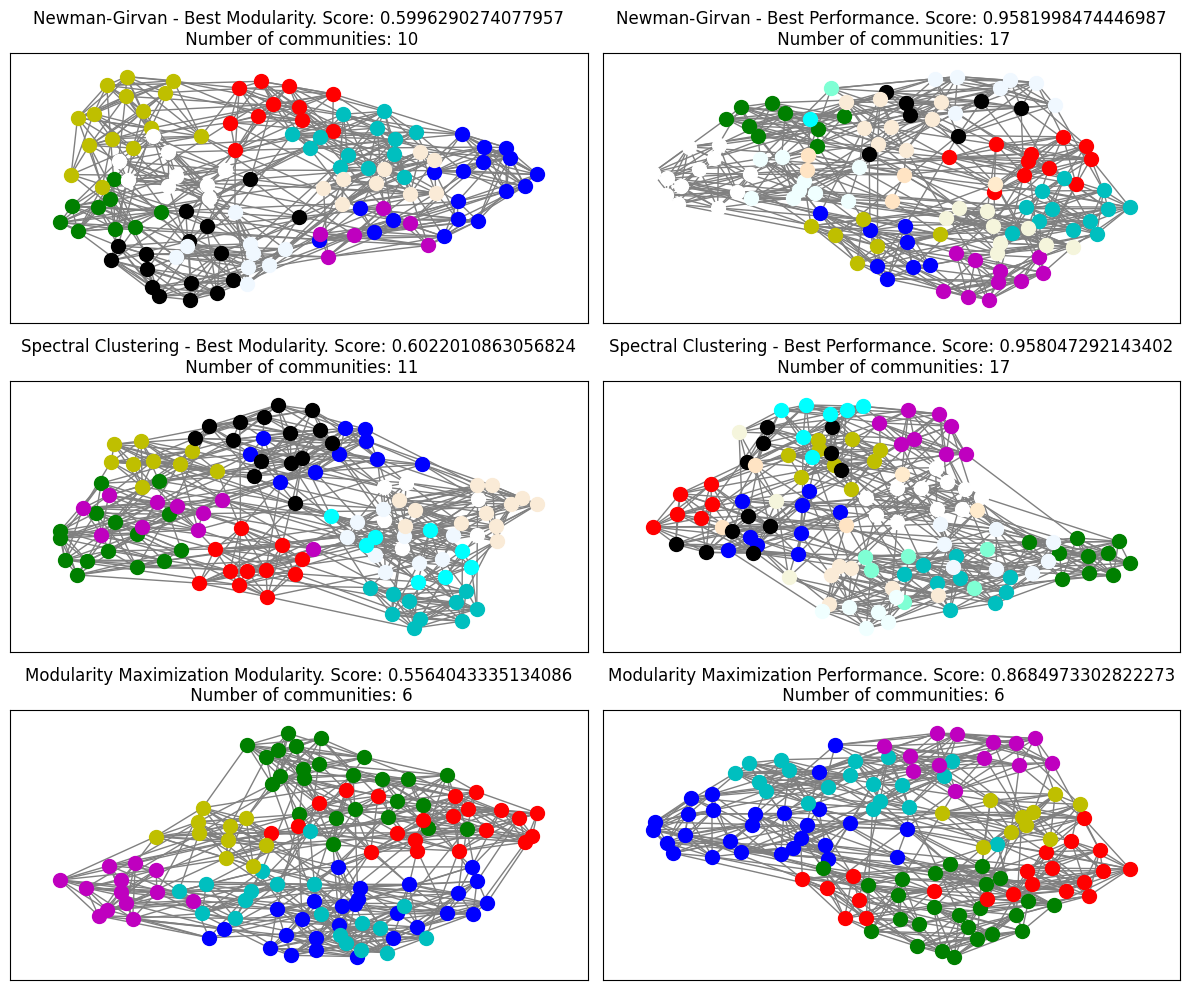

In [ ]:
plt.figure(figsize=(12, 10))

for i, comm in enumerate(football_total):
    plt.subplot(3, 2, i + 1)
    plt.title(list_of_methods[i]+". Score: "+str(comm[0])+"\n Number of communities: "+str(len(comm[1])))
    visualize_graphs(football, comm[1])

plt.tight_layout()
plt.show()

#### Οπτικοποίηση κοινοτήτων Game of Thrones

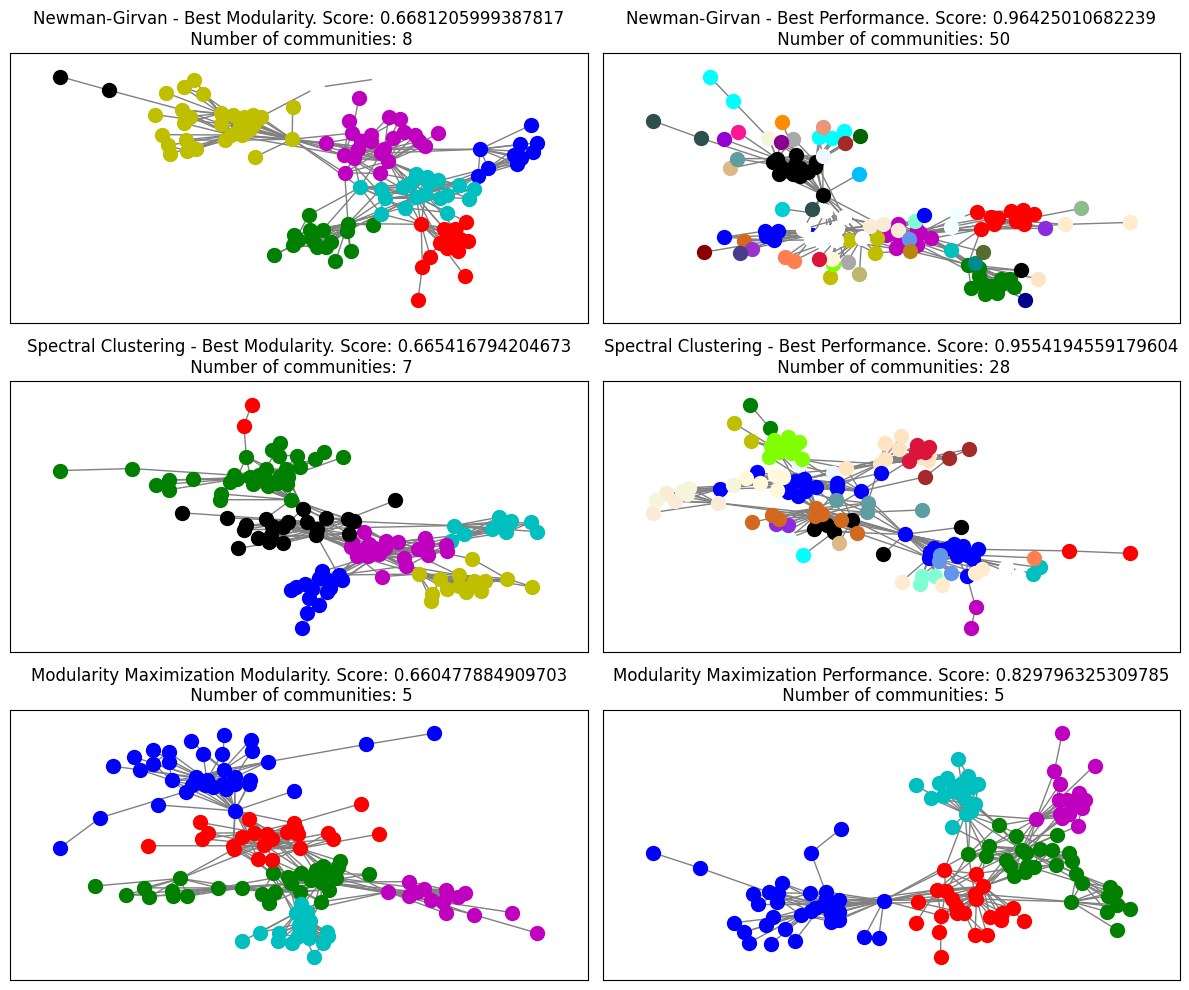

In [ ]:
plt.figure(figsize=(12, 10))

for i, comm in enumerate(got_total):
    plt.subplot(3, 2, i + 1)
    plt.title(list_of_methods[i]+". Score: "+str(comm[0])+"\n Number of communities: "+str(len(comm[1])))
    visualize_graphs(got, comm[1])

plt.tight_layout()
plt.show()

#### Οπτικοποίηση κοινοτήτων email-Eu-core (να οπτικοποιηθεί και η ground-truth διαμέριση)

In [ ]:
eu_ground_truth = nx.read_edgelist("email-Eu-core-department-labels.txt", create_using=nx.Graph())
eu_ground_truth.remove_edges_from(nx.selfloop_edges(eu_ground_truth))
#email-Eu-core-department-labels.txt is a txt file where the second int of each row
#is the community the node belongs to
list_of_communities = set()
dictionary_for_communities = {}
dictionary_for_labels = {}
with open('email-Eu-core-department-labels.txt', 'r') as file:
    for line in file:
        numbers = line.split()
        node = (numbers[0])
        community = (numbers[1])
        list_of_communities.add(community)
        if community not in dictionary_for_communities:
          dictionary_for_communities[community] = set()
        dictionary_for_communities[community].add(node)
        dictionary_for_labels[node] = str(community)
listie = list(list_of_communities)
print("EU ground-truth partition, number of communities: " + str(len(listie)))
lily = list(dictionary_for_communities.values()) #list of lists
modularity = quality.modularity(eu, lily)
performance = nx.algorithms.community.quality.partition_quality(eu, lily)[1]
print("Modularity: "+str(modularity)+" and performace: "+str(performance))

EU ground-truth partition, number of communities: 42
Modularity: 0.28801318862374214 and performace: 0.942871300866187


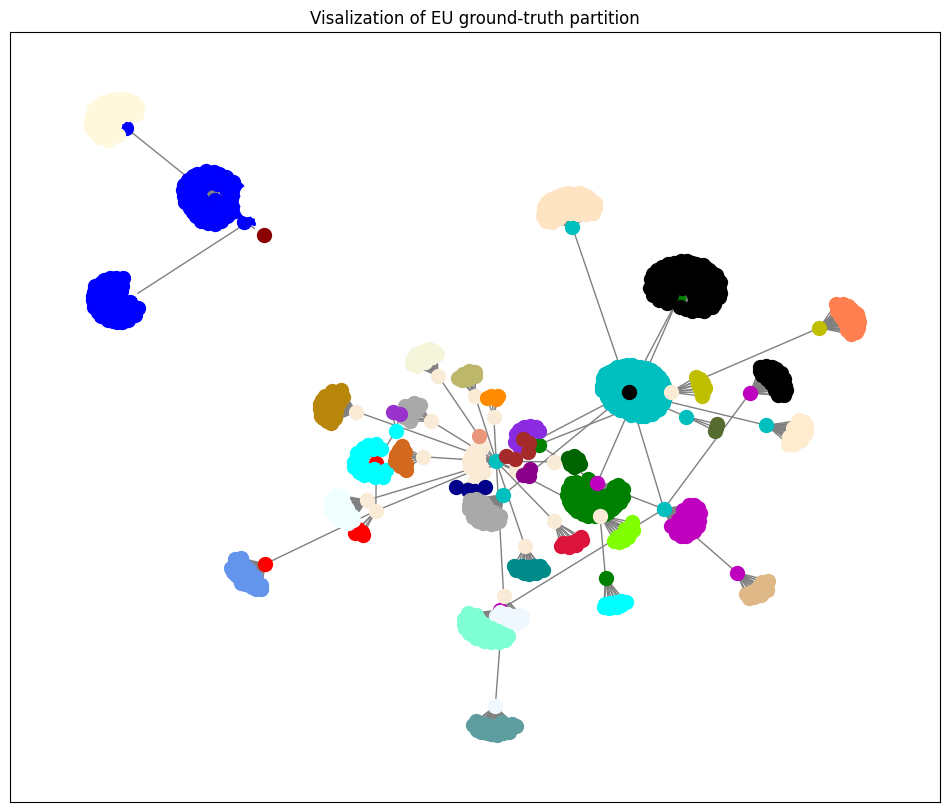

In [ ]:
plt.figure(figsize=(12, 10))
plt.title("Visalization of EU ground-truth partition")
visualize_graphs(eu_ground_truth, lily)

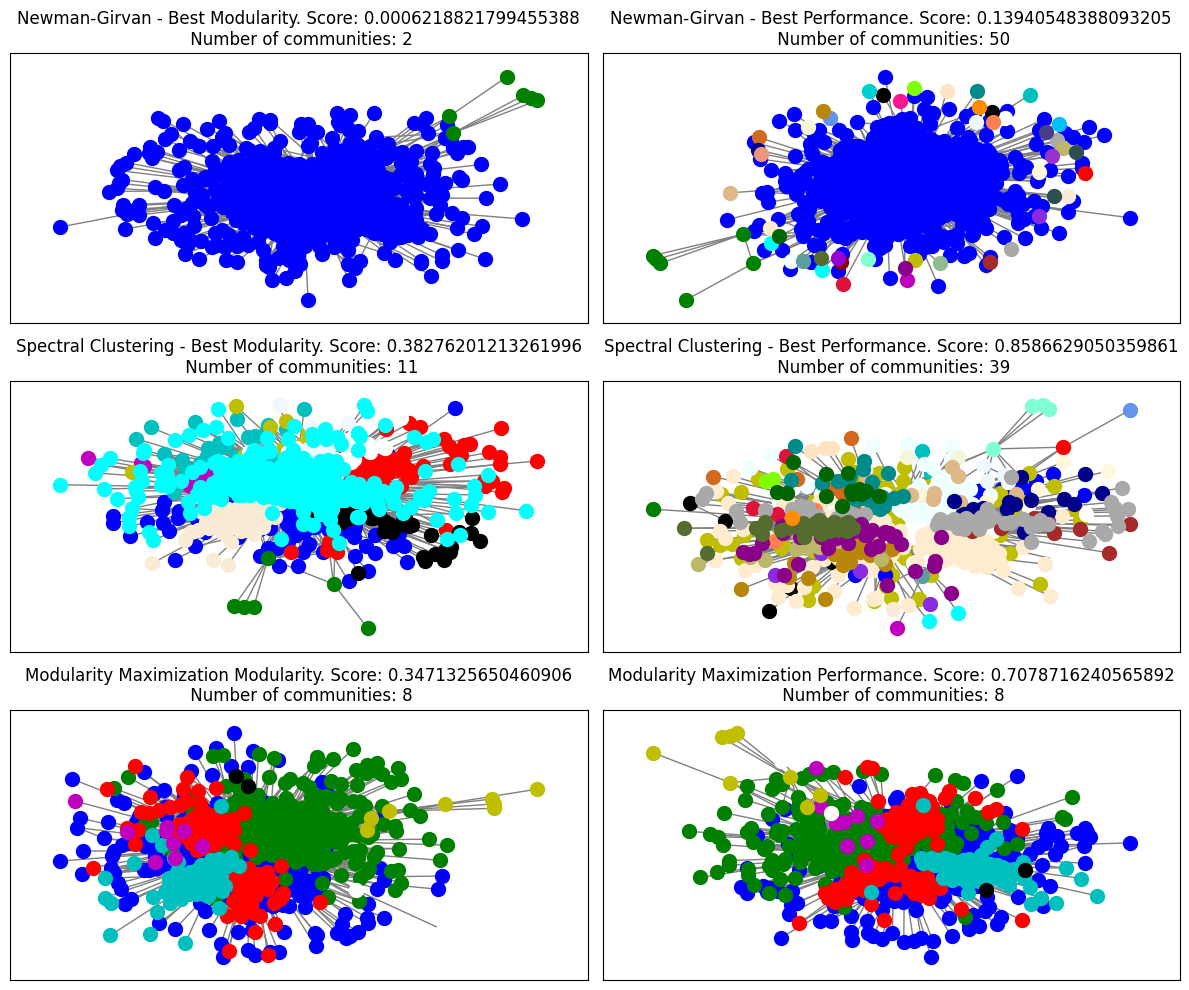

In [ ]:
plt.figure(figsize=(12, 10))

for i, comm in enumerate(eu_total):
    plt.subplot(3, 2, i + 1)
    plt.title(list_of_methods[i]+". Score: "+str(comm[0])+"\n Number of communities: "+str(len(comm[1])))
    visualize_graphs(eu_graph, comm[1])

plt.tight_layout()
plt.show()

#### Οπτικοποίηση κοινοτήτων REG

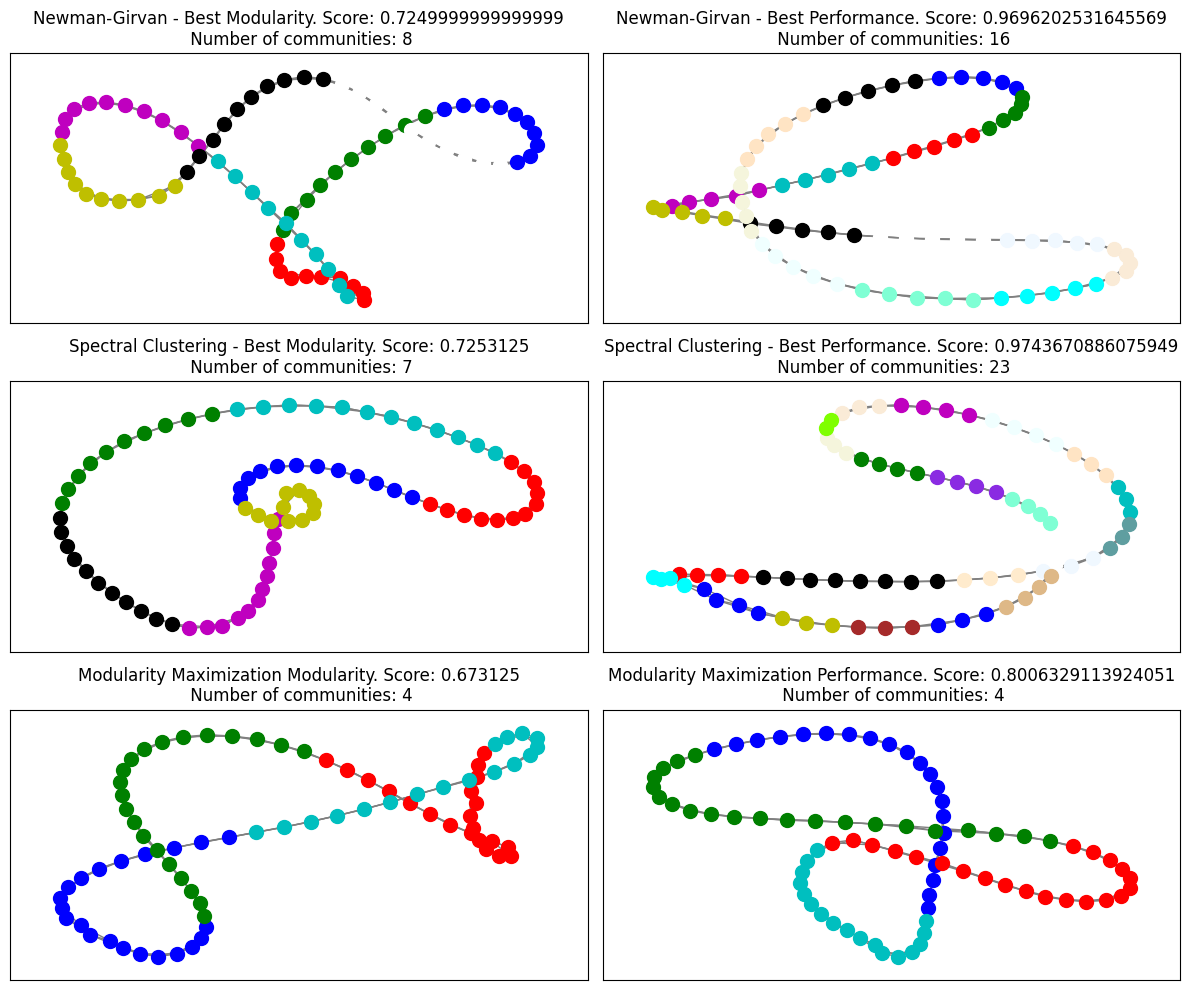

In [ ]:
plt.figure(figsize=(12, 10))

for i, comm in enumerate(REG_total):
    plt.subplot(3, 2, i + 1)
    plt.title(list_of_methods[i]+". Score: "+str(comm[0])+"\n Number of communities: "+str(len(comm[1])))
    visualize_graphs(REG, comm[1])

plt.tight_layout()
plt.show()

#### Οπτικοποίηση κοινοτήτων RGER

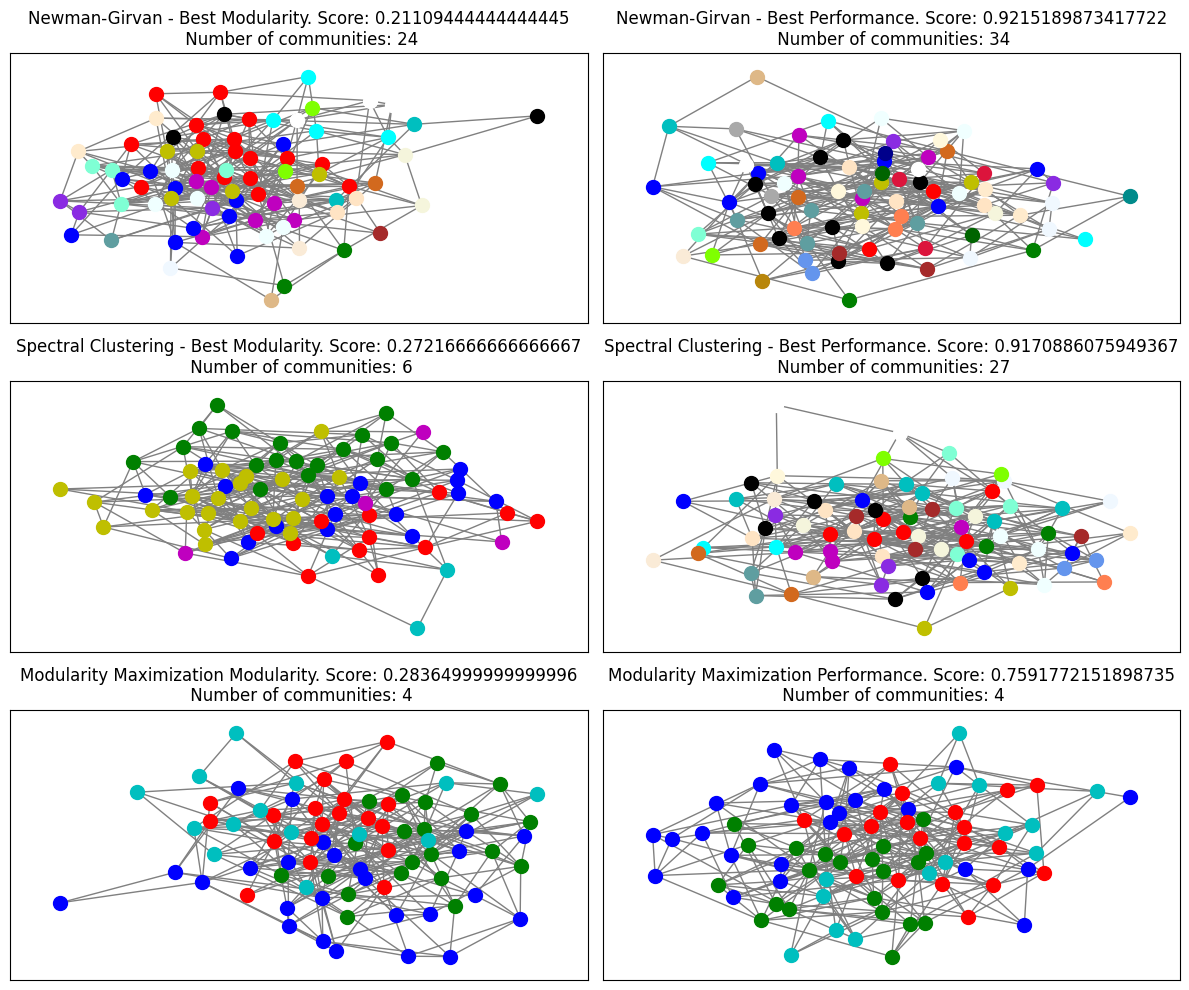

In [ ]:
plt.figure(figsize=(12, 10))

for i, comm in enumerate(RGER_total):
    plt.subplot(3, 2, i + 1)
    plt.title(list_of_methods[i]+". Score: "+str(comm[0])+"\n Number of communities: "+str(len(comm[1])))
    visualize_graphs(RGER, comm[1])

plt.tight_layout()
plt.show()

#### Οπτικοποίηση κοινοτήτων RGG

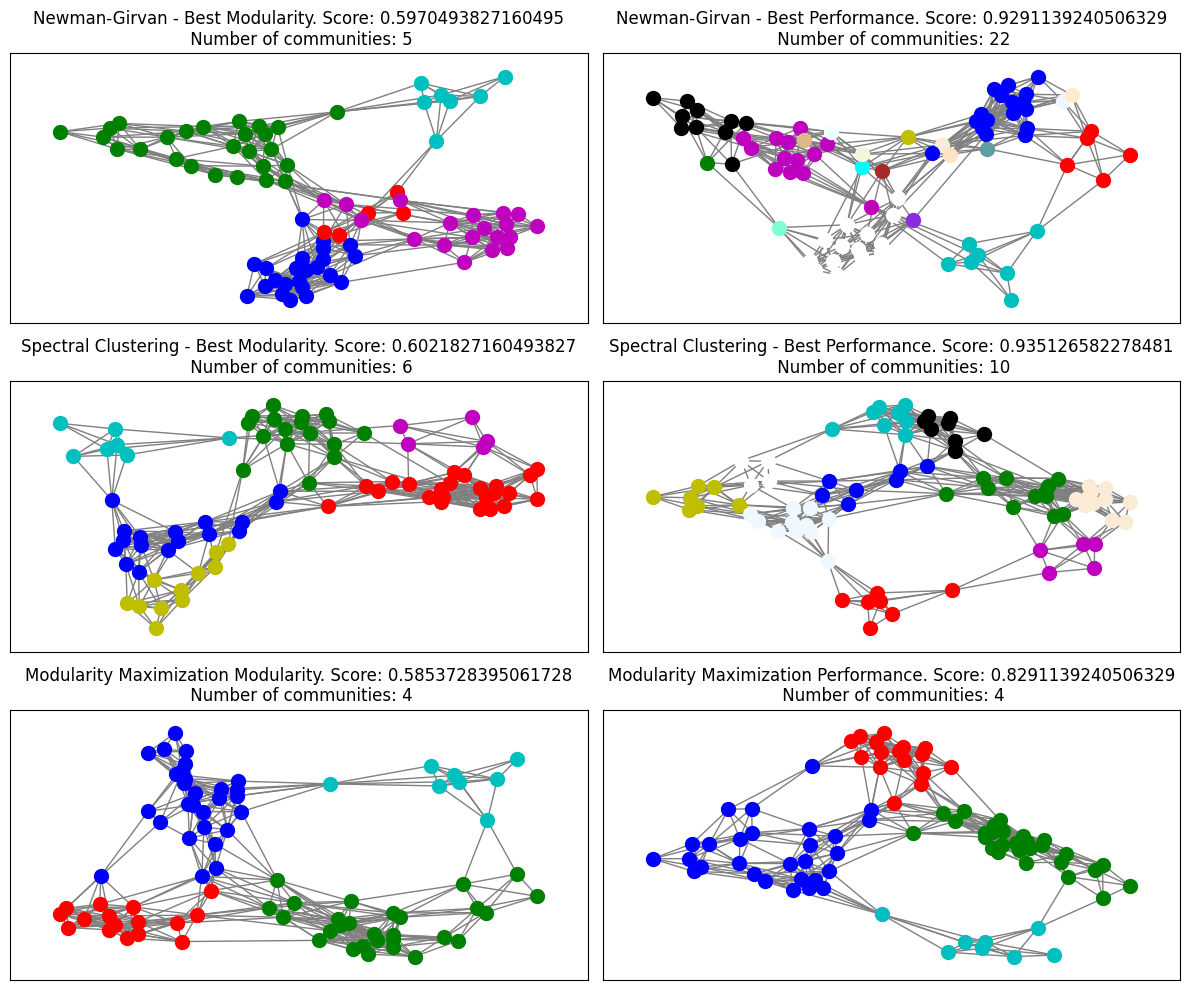

In [ ]:
plt.figure(figsize=(12, 10))

for i, comm in enumerate(RGG_total):
    plt.subplot(3, 2, i + 1)
    plt.title(list_of_methods[i]+". Score: "+str(comm[0])+"\n Number of communities: "+str(len(comm[1])))
    visualize_graphs(RGG, comm[1])

plt.tight_layout()
plt.show()

#### Οπτικοποίηση κοινοτήτων SW

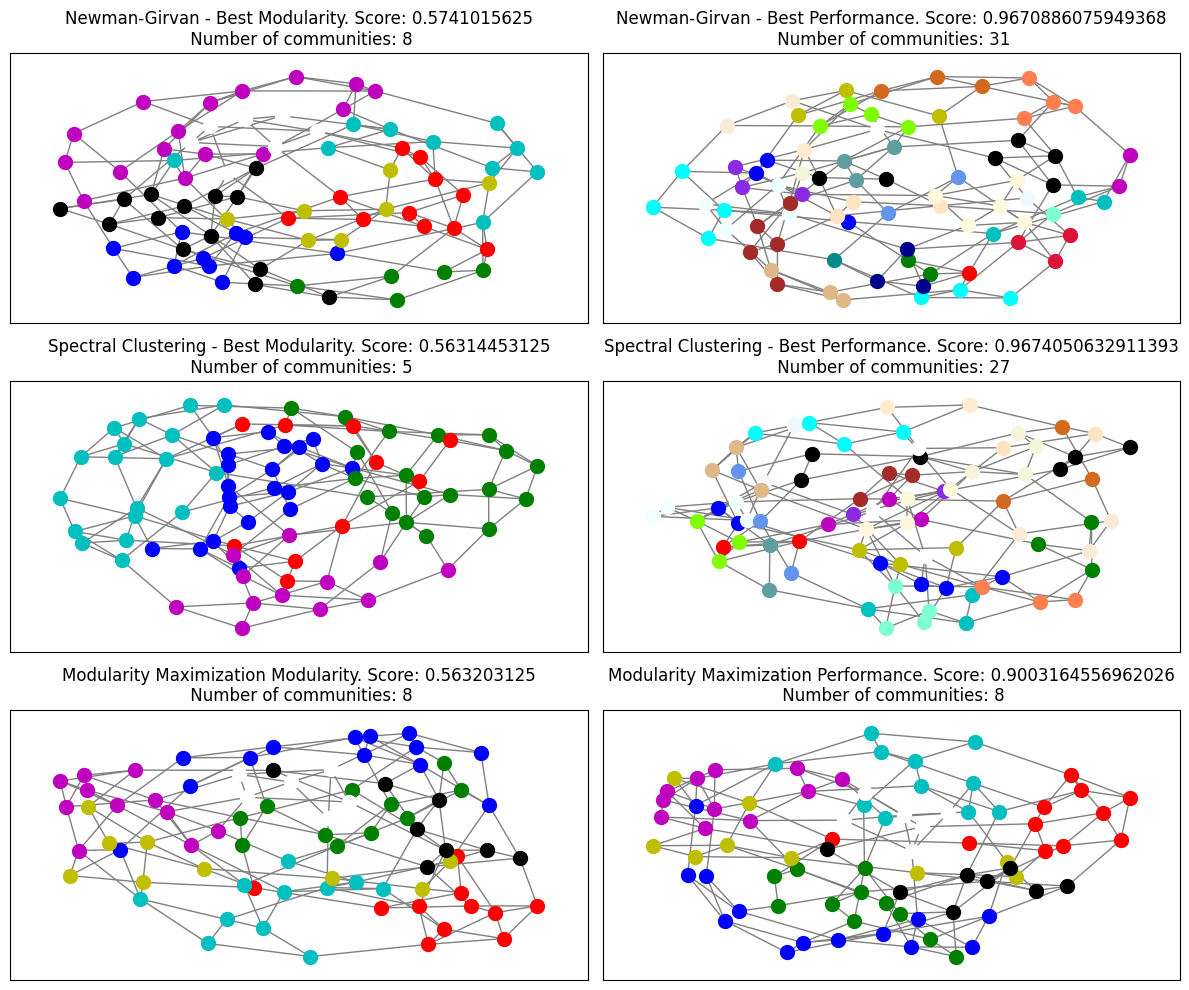

In [ ]:
plt.figure(figsize=(12, 10))

for i, comm in enumerate(SW_total):
    plt.subplot(3, 2, i + 1)
    plt.title(list_of_methods[i]+". Score: "+str(comm[0])+"\n Number of communities: "+str(len(comm[1])))
    visualize_graphs(SW, comm[1])

plt.tight_layout()
plt.show()

#### Οπτικοποίηση κοινοτήτων SF

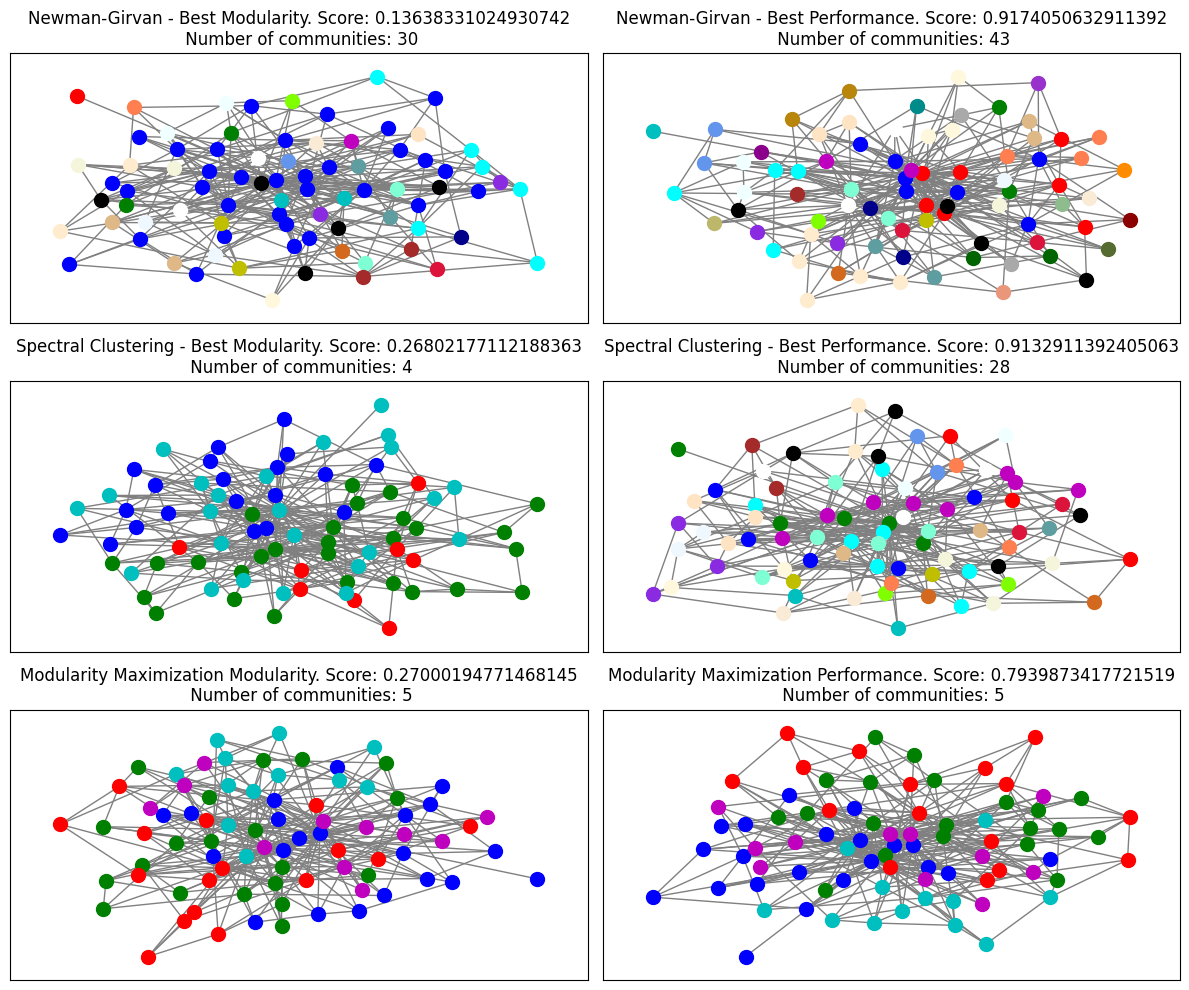

In [ ]:
plt.figure(figsize=(12, 10))

for i, comm in enumerate(SF_total):
    plt.subplot(3, 2, i + 1)
    plt.title(list_of_methods[i]+". Score: "+str(comm[0])+"\n Number of communities: "+str(len(comm[1])))
    visualize_graphs(SF, comm[1])

plt.tight_layout()
plt.show()

<font size="5">**Σχολιασμός αποτελεσμάτων:**

***


**Σύγκριση αλγορίθμων**

Στον παρακάτω πίνακα φαίνονται για κάθε ζεγάρι αλγορίθμου-γράφου με τη σειρά οι μετρικές χρόνου (sec), κοινοτήτων που δημιουργήθηκαν, και καλύτερου score (modularity, performance):

<table style=width:100%>
    <caption><p style=text-align:justify>Συνολικά αποτελέσματα</caption>
    <caption><p style=text-align:justify>Χρόνος εκτέλεσης</caption>
<tr>
    <th style=text-align:left>Aλγόριθμος</th>
    <th style=text-align:left>REG</th>
    <th style=text-align:left>RGER</th>
    <th style=text-align:left>RGG</th>
    <th style=text-align:left>SF</th>
    <th style=text-align:left>SW</th>
    <th style=text-align:left>Football</th>
    <th style=text-align:left>GOT</th>
    <th style=text-align:left>EU</th>
    
</tr>
<tr>
    <td style=text-align:left><p style=text-align:justify>Newman-Girvan</td>
    <td style=text-align:left><p style=text-align:justify> 00:00</p></td>
    <td style=text-align:left><p style=text-align:justify> 00:03</p></td>
    <td style=text-align:left><p style=text-align:justify> 00:02</p></td>
    <td style=text-align:left><p style=text-align:justify> 00:05</p></td>
    <td style=text-align:left><p style=text-align:justify> 00:00</p></td>
    <td style=text-align:left><p style=text-align:justify> 00:07</p></td>
    <td style=text-align:left><p style=text-align:justify> 00:04</p></td>
    <td style=text-align:left><p style=text-align:justify> 17:55</p></td>
    <td> </td>
</tr>  
<tr>
    <td style=text-align:left><p style=text-align:justify>Sepctral Clustering</td>
    <td style=text-align:left><p style=text-align:justify> 00:002</p></td>
    <td style=text-align:left><p style=text-align:justify> 00:003</p></td>
    <td style=text-align:left><p style=text-align:justify> 00:004</p></td>
    <td style=text-align:left><p style=text-align:justify> 00:003</p></td>
    <td style=text-align:left><p style=text-align:justify> 00:002</p></td>
    <td style=text-align:left><p style=text-align:justify> 00:005</p></td>
    <td style=text-align:left><p style=text-align:justify> 00:04</p></td>
    <td style=text-align:left><p style=text-align:justify> 00:06</p></td>
    <td> </td>
</tr>
<tr>
    <td style=text-align:left><p style=text-align:justify>Modularity Maximization</td>
    <td style=text-align:left><p style=text-align:justify> 00:05</p></td>
    <td style=text-align:left><p style=text-align:justify> 00:03</p></td>
    <td style=text-align:left><p style=text-align:justify> 00:05</p></td>
    <td style=text-align:left><p style=text-align:justify> 00:04</p></td>
    <td style=text-align:left><p style=text-align:justify> 00:03</p></td>
    <td style=text-align:left><p style=text-align:justify> 00:08</p></td>
    <td style=text-align:left><p style=text-align:justify> 00:06</p></td>
    <td style=text-align:left><p style=text-align:justify> 00:57</p></td>
    <td> </td>
</tr>
    
</table>

<table style=width:100%>
    <caption><p style=text-align:justify>Αριθμός κοινοτήτων και σκορ - Modularity</caption>
<tr>
    <th style=text-align:left>Aλγόριθμος</th>
    <th style=text-align:left>REG</th>
    <th style=text-align:left>RGER</th>
    <th style=text-align:left>RGG</th>
    <th style=text-align:left>SF</th>
    <th style=text-align:left>SW</th>
    <th style=text-align:left>Football</th>
    <th style=text-align:left>GOT</th>
    <th style=text-align:left>EU</th>
    
</tr>
<tr>
    <td style=text-align:left><p style=text-align:justify>Newman-Girvan</td>
    <td style=text-align:left><p style=text-align:justify> 8 | 0.72</p></td>
    <td style=text-align:left><p style=text-align:justify> 24 | 0.21</p></td>
    <td style=text-align:left><p style=text-align:justify> 5 | 0.60</p></td>
    <td style=text-align:left><p style=text-align:justify> 30 | 0.14</p></td>
    <td style=text-align:left><p style=text-align:justify> 8 | 0.57</p></td>
    <td style=text-align:left><p style=text-align:justify> 10 | 0.60</p></td>
    <td style=text-align:left><p style=text-align:justify> 8 | 0.69</p></td>
    <td style=text-align:left><p style=text-align:justify> 2 | 0.00</p></td>
    <td> </td>
</tr>  
<tr>
    <td style=text-align:left><p style=text-align:justify>Sepctral Clustering</td>
    <td style=text-align:left><p style=text-align:justify> 7 | 0.73</p></td>
    <td style=text-align:left><p style=text-align:justify> 6 | 0.27</p></td>
    <td style=text-align:left><p style=text-align:justify> 6 | 0.60</p></td>
    <td style=text-align:left><p style=text-align:justify> 4 | 0.27</p></td>
    <td style=text-align:left><p style=text-align:justify> 5 | 0.56</p></td>
    <td style=text-align:left><p style=text-align:justify> 11 | 0.60</p></td>
    <td style=text-align:left><p style=text-align:justify> 7 | 0.67</p></td>
    <td style=text-align:left><p style=text-align:justify> 11 | 0.38</p></td>
    <td> </td>
</tr>
<tr>
    <td style=text-align:left><p style=text-align:justify>Modularity Maximization</td>
    <td style=text-align:left><p style=text-align:justify> 4 | 0.67</p></td>
    <td style=text-align:left><p style=text-align:justify> 4 | 0.28</p></td>
    <td style=text-align:left><p style=text-align:justify> 4 | 0.59</p></td>
    <td style=text-align:left><p style=text-align:justify> 5 | 0.27</p></td>
    <td style=text-align:left><p style=text-align:justify> 8 | 0.56</p></td>
    <td style=text-align:left><p style=text-align:justify> 6| 0.56</p></td>
    <td style=text-align:left><p style=text-align:justify> 5 | 0.66</p></td>
    <td style=text-align:left><p style=text-align:justify> 8 | 0.35</p></td>
    <td> </td>
</tr>
    
</table>

<table style=width:100%>
    <caption><p style=text-align:justify>Αριθμός κοινοτήτων και σκορ - Performance</caption>
<tr>
    <th style=text-align:left>Aλγόριθμος</th>
    <th style=text-align:left>REG</th>
    <th style=text-align:left>RGER</th>
    <th style=text-align:left>RGG</th>
    <th style=text-align:left>SF</th>
    <th style=text-align:left>SW</th>
    <th style=text-align:left>Football</th>
    <th style=text-align:left>GOT</th>
    <th style=text-align:left>EU</th>
    
</tr>
<tr>
    <td style=text-align:left><p style=text-align:justify>Newman-Girvan</td>
    <td style=text-align:left><p style=text-align:justify> 16 | 0.97</p></td>
    <td style=text-align:left><p style=text-align:justify> 34 | 0.92</p></td>
    <td style=text-align:left><p style=text-align:justify> 22 | 0.93</p></td>
    <td style=text-align:left><p style=text-align:justify> 43 | 0.92</p></td>
    <td style=text-align:left><p style=text-align:justify> 31 | 0.97</p></td>
    <td style=text-align:left><p style=text-align:justify> 17 | 0.96</p></td>
    <td style=text-align:left><p style=text-align:justify> 50 | 0.96</p></td>
    <td style=text-align:left><p style=text-align:justify> 50 | 0.13</p></td>
    <td> </td>
</tr>  
<tr>
    <td style=text-align:left><p style=text-align:justify>Sepctral Clustering</td>
    <td style=text-align:left><p style=text-align:justify> 23 | 0.97</p></td>
    <td style=text-align:left><p style=text-align:justify> 27 | 0.92</p></td>
    <td style=text-align:left><p style=text-align:justify> 10 | 0.94</p></td>
    <td style=text-align:left><p style=text-align:justify> 28 | 0.91</p></td>
    <td style=text-align:left><p style=text-align:justify> 27 | 0.97</p></td>
    <td style=text-align:left><p style=text-align:justify> 17 | 0.96</p></td>
    <td style=text-align:left><p style=text-align:justify> 28 | 0.95</p></td>
    <td style=text-align:left><p style=text-align:justify> 39 | 0.86</p></td>
    <td> </td>
</tr>
<tr>
    <td style=text-align:left><p style=text-align:justify>Modularity Maximization</td>
    <td style=text-align:left><p style=text-align:justify> 4 | 0.80</p></td>
    <td style=text-align:left><p style=text-align:justify> 4 | 0.76</p></td>
    <td style=text-align:left><p style=text-align:justify> 4 | 0.83</p></td>
    <td style=text-align:left><p style=text-align:justify> 5 | 0.79</p></td>
    <td style=text-align:left><p style=text-align:justify> 8 | 0.90</p></td>
    <td style=text-align:left><p style=text-align:justify> 6| 0.89</p></td>
    <td style=text-align:left><p style=text-align:justify> 5 | 0.83</p></td>
    <td style=text-align:left><p style=text-align:justify> 8 | 0.70</p></td>
    <td> </td>
</tr>
    
</table>



*   Χρόνος: σε ό,τι έχει να κάνει με το χρόνο εκτέλεσης, ο αλγόριθμος Newman-Girvan απαιτεί σημαντικά περισσότερο χρόνο σε σχέση με τους άλλους, γεγονός που γίνεται ιδιαιτέρως αντιληπτό στην περίπτωση μεγαλύτερων γράφων (όπως ο γράφος EU, για τον οποίο χρειάστηκε περίπου 20 λεπτά μέχρι να ολοκληρωθεί). Ο λιγότερο απαιτητικός σε χρόνο αλγόριθμος είναι ο Modularity Maximization, που χρειάστηκε λίγα μόνο δευτερόλεπτα για κάθε γράφο (10 για τον EU). Και στους 3 αλγόριθμους, όπως ήταν αναμενόμενο, παρατηρούμε σχέση αναλογίας ανάμεσα στα μεγέθη μέγεθος/πολυπλοκότητα γράφου-χρόνος εκτέλεσης αλγορίθμου.


*   Αριθμός κοινοτήτων: ο αλγόριθμος που παράγει τον μεγαλύτερο αριθμό κοινοτήτων είναι σαφώς ο Newman-Girvan, ο οποίος τρέχει με στόχο τη μεγιστοποίηση των κοινοτήτων και άρα του modularity score. Από τους άλλους δύο αλγορίθμους, ο Spectral Clustering φαίνεται να παράγει μεγαλύτερες κοινότητες με μεγαλύτερη συχνότητα από τον Modularity Maximization, με μικρή όμως απόκλιση και διαφορά μεταξύ των 2.

*   Σκορ: παρ'όλο που ο αλγόριθμος Newman-Girvan παράγει γενικά μεγαλύτερο αριθμό κοινοτήτων, αυτός και ο spectral clustering φαίνεται να επιτυγχάνουν παρόμοια modularity και performance scores, με τον Spectral Clustering να επιτυγχάνει γενικά ελαφρώς μεγαλύτερα. Ο αλγόριθμος Modularity Maximization επιτυγχάνει μικρότερα σκορ σε όλες τις περιπτώσεις γράφων.



Συμπέρασμα: ο αλγόριθμος που δεν έχει μεγάλο χρονικό-υπολογιστικό κόστος και επιτυγχάνει σχετικά μεγάλα σκορ στις μετρικές είναι ο Spectral Clustering, και αυτό τον καθιστά τον καταλληλότερο στην γενική περίπτωση. Ο Newman-Girvan επιτυγχάνει μεγάλα σκορ αλλά σε μεγάλο χρονικό-υπολογιστικό κόστος, οπότε είναι κατάλληλος μόνο αν δεν μας ενδιαφέρει το κόστος αυτό και επιθυμούμε υψηλά αποτελέσματα στις μετρικές. Ο Modularity Maximization είναι ο λιγότερο πολύπλοκος χρονικουπολογιστικά, αλλά επιτυγχάνει και τα μικρότερα σκορ, οπότε είναι ο καταλληλότερος μόνο όταν μας ενδιαφέρει η γρήγορη εκτέλεση περισσότερο από την καλύτερη διαχώριση.


**Συνθετικά δίκτυα**



*   REG: όπως είναι αναμενόμενο, βλέπουμε ότι οι μεταξύ τους adjacent κόμβοι σχηματίζουν κοινότητες, ανεξαρτήτως ποιου αλγορίθμου χρησιμοποιούμε για τα partitions. Έχει συνολικά τις μεγαλύτερες μετρικές σε modularity και performance, όπως και είναι αναμενόμενο από την ομοιομορφία του γράφου.
*   RGER: μαζί με τον SF, στο γράφο επιτυγχάνονται τα χαμηλότερα modularity scores ανάμεσα στα συνθετικά δίκτυα. Στην οπτικοποίηση δεν είναι ξεκάθαρες οι κοινότητες, γεγονός που πιθανώς να οφείλεται στην τυχαιότητα του γράφου.
*   RGG: στον γράφο αυτό επιτυγχάνονται αρκε΄τα υψηλά modularity και performance scores. Στην οπτικοποίηση, ο διαχωρισμός των κοινοτήτων είναι ξεκάθαρος, και επιβεβαιώνουμε ότι υπάρχει φαίνεται να υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου.
*   SW: ομοίως με τον RGG, στον γράφο αυτό επιτυγχάνονται αρκε΄τα υψηλά modularity και performance scores, γεγονός που είναι αναμενόμενο από την heavy-tailed κατανομή βαθμών που ακολουθεί ο γράφος. Στην οπτικοποίηση, ο διαχωρισμός των κοινοτήτων δεν είναι όσο ξεκάθαρος ήταν στον RGG αλλά και πάλι διακρίνεται σχετικά καλά η τοπογραφική ομαδοποίηση των κόμβων.
*   SF: μπορούμε να επιβεβαιώσουμε τον σχηματισμό κοινοτήτων γύρω από τους περισσότερους κόμβους με μεγαλύτερο βαθμό (λίγοι κόμβοι στο κέντρο κάθε οπτικοποίησης). Τα score που επιτυγχάνονται είναι σχετικά χαμηλότερα από αυτά των υπολοίπων συνθετικών τοπολογιών.



**EU και ground-truth**

Η ground-truth διαμέριση παράγει 42 κοινότητες και έχει μετρικές 0.29 (modularity) και 0.94 (performance).

Ο αλγόριθμος μέσω του οποίου επιτυγχάνονται μετρικές κοντινότερες σε αυτές της ground-truth είναι ο Spectral Clustering. Ο Modularity Maximization επιτυγχάνει κι αυτός σχετικά κοντινές τιμές, ενώ οι τιμές του Newman-Girvan έχουν μεγάλη απόκλιση.

Ο αλγόριθμος που δίνει κοντινότερα πάνω στο γράφο eu_graph σχετικά με τον διαχωρισμό σε κοινότητες είναι και πάλι αυτός του Spectral Clustering, με 37 κοινότητες. Ο Newman-Girvan επιτυγχάνει 2 και 50 κοινότητες αντίστοιχα (ο μικρότερος και μεγαλύτερος δυνατός αριθμός), με πολύ χαμηλά σκορ.

Άρα, γενικά συμπεραίνουμε ότι η μέθοδος Spectral Clustering είναι η κοντινότερη στη ground-truth διαμέριση.